<a href="https://colab.research.google.com/github/Hyunjiinko/ISYS5001_Weatherwise_Hyunjin-Ko/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus
!pip install requests
!pip install matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 03dd65f7ced644fd94c827b875031efb.jLeq9yiATEYyL-9YBskbvzW7


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

## 🌤️ Weather Data Functions

In [24]:
# Define get_weather_data() function here
import requests

def get_weather_data(location, forecast_days=3):
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()

        if "current_condition" not in data:
            return {"error": "No weather data available for this location."}

        result = {
            "temperature": data["current_condition"][0]["temp_C"],
            "humidity": data["current_condition"][0]["humidity"],
            "forecast": [
                {
                    "date": d["date"],
                    "max_temp": d["maxtempC"],
                    "min_temp": d["mintempC"]
                }
                for d in data.get("weather", [])[:forecast_days]
            ]
        }
        return result
    except requests.exceptions.RequestException:
        return {"error": "Failed to fetch weather data. Please check the location or try again later."}


In [20]:
print(get_weather_data("Perth"))


{'temperature': '19', 'humidity': '52', 'forecast': [{'date': '2025-09-30', 'max_temp': '18', 'min_temp': '12'}, {'date': '2025-10-01', 'max_temp': '19', 'min_temp': '13'}, {'date': '2025-10-02', 'max_temp': '23', 'min_temp': '12'}]}


## 📊 Visualisation Functions

In [22]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["forecast"]]
    max_temps = [int(day["max_temp"]) for day in weather_data["forecast"]]
    min_temps = [int(day["min_temp"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots()
    ax.plot(dates, max_temps, marker='o', label="Max Temp (°C)")
    ax.plot(dates, min_temps, marker='o', label="Min Temp (°C)")

    ax.set_title("Temperature Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    plt.xticks(rotation=45)

    if output_type == 'figure':
        return fig
    else:
        plt.show()



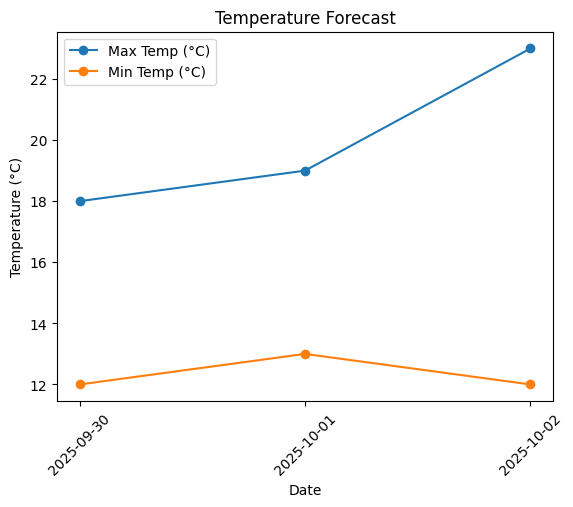

In [23]:
create_temperature_visualisation(data)


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.